In [13]:
import numpy as np
import math 
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import pandas as pd

In [14]:
#1a.)

def beta(alpha, Sn):
  beta = alpha * Sn
  
  return beta

def gamma(sigma, Sn):
  gamma = sigma * Sn

  return gamma

def simulate_path(S0, alpha, sigma, dt, N):
  S = np.zeros(N)
  S[0] = S0

  for n in range(1, N):
    dW = np.random.normal(loc = 0, scale = np.sqrt(dt))
    S[n] = S[n - 1] + (beta(alpha, S[n - 1]) * dt) + (gamma(sigma, S[n - 1]) * dW)
    if S[n] <= 0:
      return None

  return S

def get_paths(S0, alpha, sigma, dt, M, N):
  valid_paths = []
  bad_paths_count = 0

  for i in range(M):
    path = simulate_path(S0, alpha, sigma, dt, N)
    if path is None:
        bad_paths_count = bad_paths_count + 1
        print("Generated a Bad Path with Path #" + str(i) + " for Sigma = " + str(sigma))
    else:
        valid_paths.append(path) 

  return valid_paths, bad_paths_count  

1b.)
\begin{equation}
Given:\; dS_t = \alpha S_tdt + \sigma S_tdW_t,\; D(t) = e^{-rt},\; R(t) = r\\
Since:\; d\tilde{S}(t) = R(t)\tilde{S}(t)dt+\sigma(t)\tilde{S}(t)d \tilde(W)(t) \\ 
Therefore:\; d\tilde{S}_t = r\tilde{S}_tdt + \sigma \tilde{S}_t d\tilde{W}_t \\
Where:\; \tilde{S}_t = S_tD(t)
\end{equation}

\\

\begin{align}
For\ \sigma = 0.05\ and \ r = 0.05:\; d\tilde{S}_t = 0.05e^{-0.05t}S_tdt + 0.05e^{-0.05t} S_t d\tilde{W}_t \\
\end{align}

\begin{align}
For\ \sigma = 0.1 \ and \ r = 0.05:\; d\tilde{S}_t = 0.05e^{-0.05t}S_tdt + 0.1 e^{-0.05t}S_t d\tilde{W}_t \\
\end{align}

\begin{align}
For\ \sigma = 0.3 \ and \ r = 0.05:\; d\tilde{S}_t = 0.05e^{-0.05t}S_tdt + 0.3 e^{-0.05t}S_t d\tilde{W}_t \\
\end{align}

Number of Bad Paths Generated for Sigma = 0.05: 0
Number of Bad Paths Generated for Sigma = 0.1: 0
Number of Bad Paths Generated for Sigma = 0.3: 0


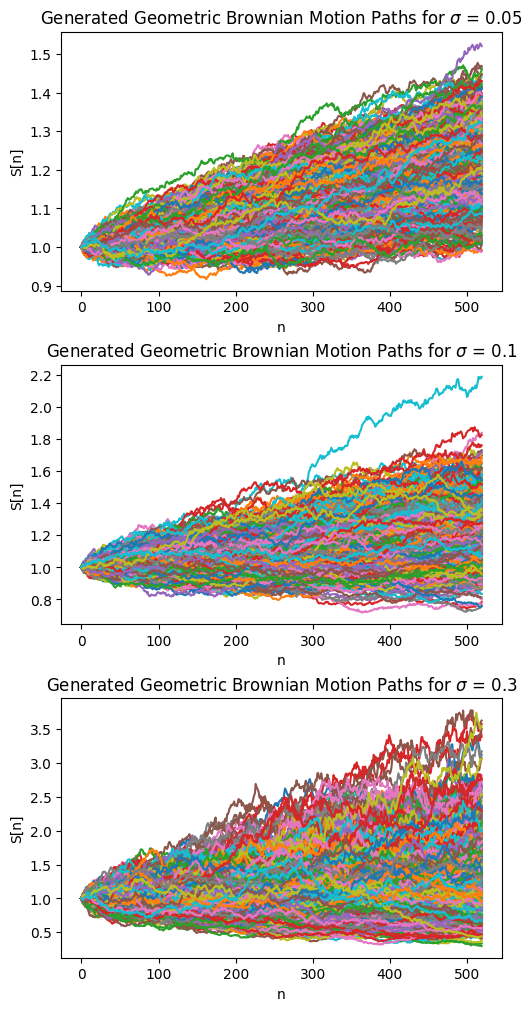

In [15]:
#1c.)

S0 = 1
alpha = 0.1
dt = 1/260
N = 520
M = 1000

paths1 = []
paths2 = []
paths3 = []

sigmas = [0.05, 0.1, 0.3]

for sigma in sigmas:
  valid_paths, bad_paths_count = get_paths(S0, alpha, sigma, dt, M, N)   
  print("Number of Bad Paths Generated for Sigma = " + str(sigma) + ": " + str(bad_paths_count))

  if sigma == 0.05:
    paths1 = paths1 + valid_paths
  if sigma == 0.1:
    paths2 = paths2 + valid_paths
  if sigma == 0.3:
    paths3 = paths3 + valid_paths

x = np.arange(0, N, 1)

fig, ax = plt.subplots(3, 1, constrained_layout = True, figsize = (5, 10))

for path in paths1:
  ax[0].plot(x, path)

ax[0].set_title("Generated Geometric Brownian Motion Paths for $\sigma$ = 0.05")
ax[0].set_xlabel("n")
ax[0].set_ylabel("S[n]") 

for path in paths2:
  ax[1].plot(x, path)

ax[1].set_title("Generated Geometric Brownian Motion Paths for $\sigma$ = 0.1")
ax[1].set_xlabel("n")
ax[1].set_ylabel("S[n]") 

for path in paths3:
  ax[2].plot(x, path)

ax[2].set_title("Generated Geometric Brownian Motion Paths for $\sigma$ = 0.3")
ax[2].set_xlabel("n")
ax[2].set_ylabel("S[n]") 

fig.show()

In [16]:
#1d.)

T = N * dt

SN_paths1 = 0
SN2_paths1 = 0

for path in paths1:
  SN_paths1 = SN_paths1 + path[len(path) - 1]
  SN2_paths1 = SN2_paths1 + path[int(len(path)/2) - 1]

ESN_paths1 = SN_paths1/len(paths1)
ESN2_paths1 = SN2_paths1/len(paths1)

print("Estimated Expected Values for σ = 0.05:")
print("E[S(N)] = ", ESN_paths1)
print("E[S(N/2)] = ", ESN2_paths1)

ESN_paths1_true = S0 * np.exp((alpha - ((sigmas[0] ** 2)/2)) * T)
ESN2_paths1_true = S0 * np.exp((alpha - ((sigmas[0] ** 2)/2)) * (T/2))

print("\nTheoretical Values for σ = 0.05:")
print("E[S(N)] = ", ESN_paths1_true)
print("E[S(N/2)] = ", ESN2_paths1_true)

SN_paths2 = 0
SN2_paths2 = 0

for path in paths2:
  SN_paths2 = SN_paths2 + path[len(path) - 1]
  SN2_paths2 = SN2_paths2 + path[int(len(path)/2) - 1]

ESN_paths2 = SN_paths2/len(paths2)
ESN2_paths2 = SN2_paths2/len(paths2)

print("\nEstimated Expected Values for σ = 0.1:")
print("E[S(N)] = ", ESN_paths2)
print("E[S(N/2)] = ", ESN2_paths2)

ESN_paths2_true = S0 * np.exp((alpha - ((sigmas[1] ** 2)/2)) * T)
ESN2_paths2_true = S0 * np.exp((alpha - ((sigmas[1] ** 2)/2)) * (T/2))

print("\nTheoretical Expected Values for σ = 0.1:")
print("E[S(N)] = ", ESN_paths2_true)
print("E[S(N/2)] = ", ESN2_paths2_true)

SN_paths3 = 0
SN2_paths3 = 0

for path in paths3:
  SN_paths3 = SN_paths3 + path[len(path) - 1]
  SN2_paths3 = SN2_paths3 + path[int(len(path)/2) - 1]

ESN_paths3 = SN_paths3/len(paths3)
ESN2_paths3 = SN2_paths3/len(paths3)

print("\nEstimated Expected Values for σ = 0.3:")
print("E[S(N)] = ", ESN_paths3)
print("E[S(N/2)] = ", ESN2_paths3)

ESN_paths3_true = S0 * np.exp((alpha - ((sigmas[2] ** 2)/2)) * T)
ESN2_paths3_true = S0 * np.exp((alpha - ((sigmas[2] ** 2)/2)) * (T/2))

print("\nTheoretical Expected Values for σ = 0.3:")
print("E[S(N)] = ", ESN_paths3_true)
print("E[S(N/2)] = ", ESN2_paths3_true)

print('''\nIt seems that the Monte Carlo Method for Estimating Expected Values of S becomes less accurate for larger volatility 
(sigma) values. This would make sense since the higher the volatility, the more the generated path values will diverge.''')

Estimated Expected Values for σ = 0.05:
E[S(N)] =  1.2199912571980325
E[S(N/2)] =  1.1042870221716419

Theoretical Values for σ = 0.05:
E[S(N)] =  1.2183530649696392
E[S(N/2)] =  1.1037903174831891

Estimated Expected Values for σ = 0.1:
E[S(N)] =  1.2232360411320427
E[S(N/2)] =  1.1061821026911431

Theoretical Expected Values for σ = 0.1:
E[S(N)] =  1.2092495976572515
E[S(N/2)] =  1.0996588551261028

Estimated Expected Values for σ = 0.3:
E[S(N)] =  1.2226884881127087
E[S(N/2)] =  1.1043658933028369

Theoretical Expected Values for σ = 0.3:
E[S(N)] =  1.1162780704588713
E[S(N/2)] =  1.0565406146754943

It seems that the Monte Carlo Method for Estimating Expected Values of S becomes less accurate for larger volatility 
(sigma) values. This would make sense since the higher the volatility, the more the generated path values will diverge.


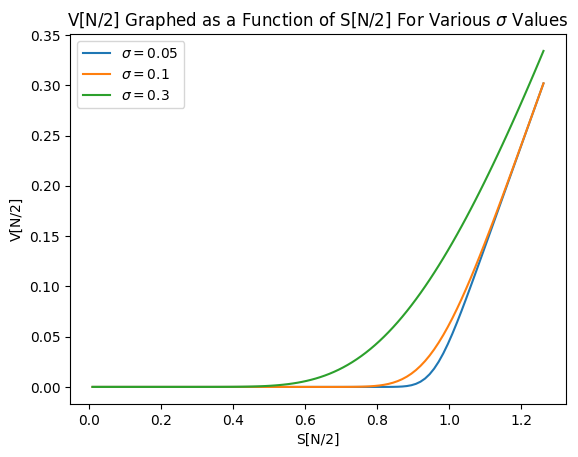

In [17]:
#1e.)

def black_scholes(S, r, sigma, T, K):
  d1 = (np.log(S/K) + (r + sigma**2/2) * T)/(sigma * np.sqrt(T))
  d2 = d1 - (sigma * np.sqrt(T))
  C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
  return C

r = 0.05
K = np.exp(r * alpha * T) * S0

for sigma in sigmas:

  SN_2_list = np.linspace(0.01, 1.25 * K, 100)
  VN_2_list = black_scholes(SN_2_list, r, sigma, T/2, K)
  plt.plot(SN_2_list, VN_2_list, label = f"$\sigma = {sigma}$")

plt.title("V[N/2] Graphed as a Function of S[N/2] For Various $\sigma$ Values")
plt.xlabel("S[N/2]")
plt.ylabel("V[N/2]") 
plt.legend(loc = "upper left")

plt.show()

In [18]:
#1f.)

def european_call_option(S, K):
  european_call_option = np.maximum(0, S - K)
  
  return european_call_option

SN2_1_list = []
black_scholes_value1_list = []
monte_carlo_value1_list = []

for path in paths1[:10]:

  SN2_1 = path[int(len(path)/2) - 1]
  SN2_1_list.append(SN2_1)

  black_scholes_value1 = black_scholes(SN2_1, r, sigmas[0], T/2, K)
  black_scholes_value1_list.append(black_scholes_value1)

  new_valid_paths, new_bad_paths_count = get_paths(SN2_1, r, sigmas[0], dt, M, int(N/2))   

  monte_carlo_value1 = 0
  for path in new_valid_paths:
    monte_carlo_value1 = monte_carlo_value1 + european_call_option(path[len(path) - 1], K) 

  monte_carlo_value1 = np.exp(-r * T/2) * (monte_carlo_value1)/((len(new_valid_paths)))
  monte_carlo_value1_list.append(monte_carlo_value1)

SN2_2_list = []
black_scholes_value2_list = []
monte_carlo_value2_list = []

for path in paths2[:10]:

  SN2_2 = path[int(len(path)/2) - 1]
  SN2_2_list.append(SN2_2)

  black_scholes_value2 = black_scholes(SN2_2, r, sigmas[1], T/2, K)
  black_scholes_value2_list.append(black_scholes_value2)

  new_valid_paths, new_bad_paths_count = get_paths(SN2_2, r, sigmas[1], dt, M, int(N/2))   

  monte_carlo_value2 = 0
  for path in new_valid_paths:
    monte_carlo_value2 = monte_carlo_value2 + european_call_option(path[len(path) - 1], K) 

  monte_carlo_value2 = np.exp(-r * T/2) * (monte_carlo_value2)/((len(new_valid_paths)))
  monte_carlo_value2_list.append(monte_carlo_value2)

SN2_3_list = []
black_scholes_value3_list = []
monte_carlo_value3_list = []

for path in paths3[:10]:

  SN2_3 = path[int(len(path)/2) - 1]
  SN2_3_list.append(SN2_3)

  black_scholes_value3 = black_scholes(SN2_3, r, sigmas[2], T/2, K)
  black_scholes_value3_list.append(black_scholes_value3)

  new_valid_paths, new_bad_paths_count = get_paths(SN2_3, r, sigmas[2], dt, M, int(N/2))   

  monte_carlo_value3 = 0
  for path in new_valid_paths:
    monte_carlo_value3 = monte_carlo_value3 + european_call_option(path[len(path) - 1], K) 

  monte_carlo_value3 = np.exp(-r * T/2) * (monte_carlo_value3)/((len(new_valid_paths)))
  monte_carlo_value3_list.append(monte_carlo_value3)

df1 = pd.DataFrame(data = {'S[N/2]': SN2_1_list, 'Black Scholes V[N/2]': black_scholes_value1_list, 'Monte Carlo V[N/2]': monte_carlo_value1_list})
df2 = pd.DataFrame(data = {'S[N/2]': SN2_2_list, 'Black Scholes V[N/2]': black_scholes_value2_list, 'Monte Carlo V[N/2]': monte_carlo_value2_list})
df3 = pd.DataFrame(data = {'S[N/2]': SN2_3_list, 'Black Scholes V[N/2]': black_scholes_value3_list, 'Monte Carlo V[N/2]': monte_carlo_value3_list})

print('Black Scholes V[N/2] v.s. Monte Carlo V[N/2] for σ = 0.05')
display(df1)

print('\nBlack Scholes V[N/2] v.s. Monte Carlo V[N/2] for σ = 0.1')
display(df2)

print('\nBlack Scholes V[N/2] v.s. Monte Carlo V[N/2] for σ = 0.3')
display(df3)

Black Scholes V[N/2] v.s. Monte Carlo V[N/2] for σ = 0.05


,S[N/2],Black Scholes V[N/2],Monte Carlo V[N/2]
0,1.114209,0.153442,0.153948
1,1.088018,0.127336,0.131639
2,1.140324,0.179538,0.179162
3,1.088115,0.127431,0.126783
4,0.958337,0.017937,0.017060
5,1.025595,0.067039,0.067439
6,1.021332,0.063196,0.063491
7,1.034205,0.074969,0.074615
8,1.156209,0.195421,0.194397
9,1.090305,0.129610,0.128693



Black Scholes V[N/2] v.s. Monte Carlo V[N/2] for σ = 0.1


,S[N/2],Black Scholes V[N/2],Monte Carlo V[N/2]
0,1.172118,0.212258,0.211633
1,1.061842,0.109460,0.112240
2,1.061193,0.108907,0.106966
3,1.022739,0.077994,0.079380
4,0.850662,0.004889,0.004833
5,1.154565,0.195142,0.195207
6,1.064604,0.111825,0.112336
7,0.837128,0.003450,0.003661
8,1.282995,0.322268,0.321819
9,1.042625,0.093494,0.094365



Black Scholes V[N/2] v.s. Monte Carlo V[N/2] for σ = 0.3


,S[N/2],Black Scholes V[N/2],Monte Carlo V[N/2]
0,1.104616,0.208001,0.190921
1,1.231388,0.307732,0.314838
2,0.695448,0.017467,0.019824
3,1.469423,0.521143,0.534510
4,0.995915,0.135045,0.139008
5,1.851817,0.893037,0.892226
6,0.992089,0.132735,0.132627
7,0.762171,0.032203,0.032309
8,1.021278,0.150830,0.154325
9,1.186482,0.270913,0.266663
